In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

# Configure rc file
matplotlib.rcParams['figure.dpi'] = 300

# Configure paths
path_data           = "../data"
path_figures        = "../analysis/figures"

filename_part_four  = "Part4_Results.csv"


In [2]:
# Read DataFrame 
df = pd.read_csv(os.path.join(path_data,filename_part_four),names=["num_darts","size_round","pi_result","total_runtime","num_processors"])
df

,num_darts,size_round,pi_result,total_runtime,num_processors
0,1000,100,3.12400,0.040304,1
1,1000,100,3.21600,0.020481,2
2,1000,100,3.11500,0.010578,4
3,1000,100,3.14450,0.005392,8
4,1000,100,3.13150,0.003042,16
...,...,...,...,...,...
71,100000000,128,3.14158,201.772000,32
72,100000000,128,3.14161,148.979000,64
73,1000000000,128,3.14160,3623.630000,16
74,1000000000,128,3.14158,2014.550000,32


# Error vs. number of darts

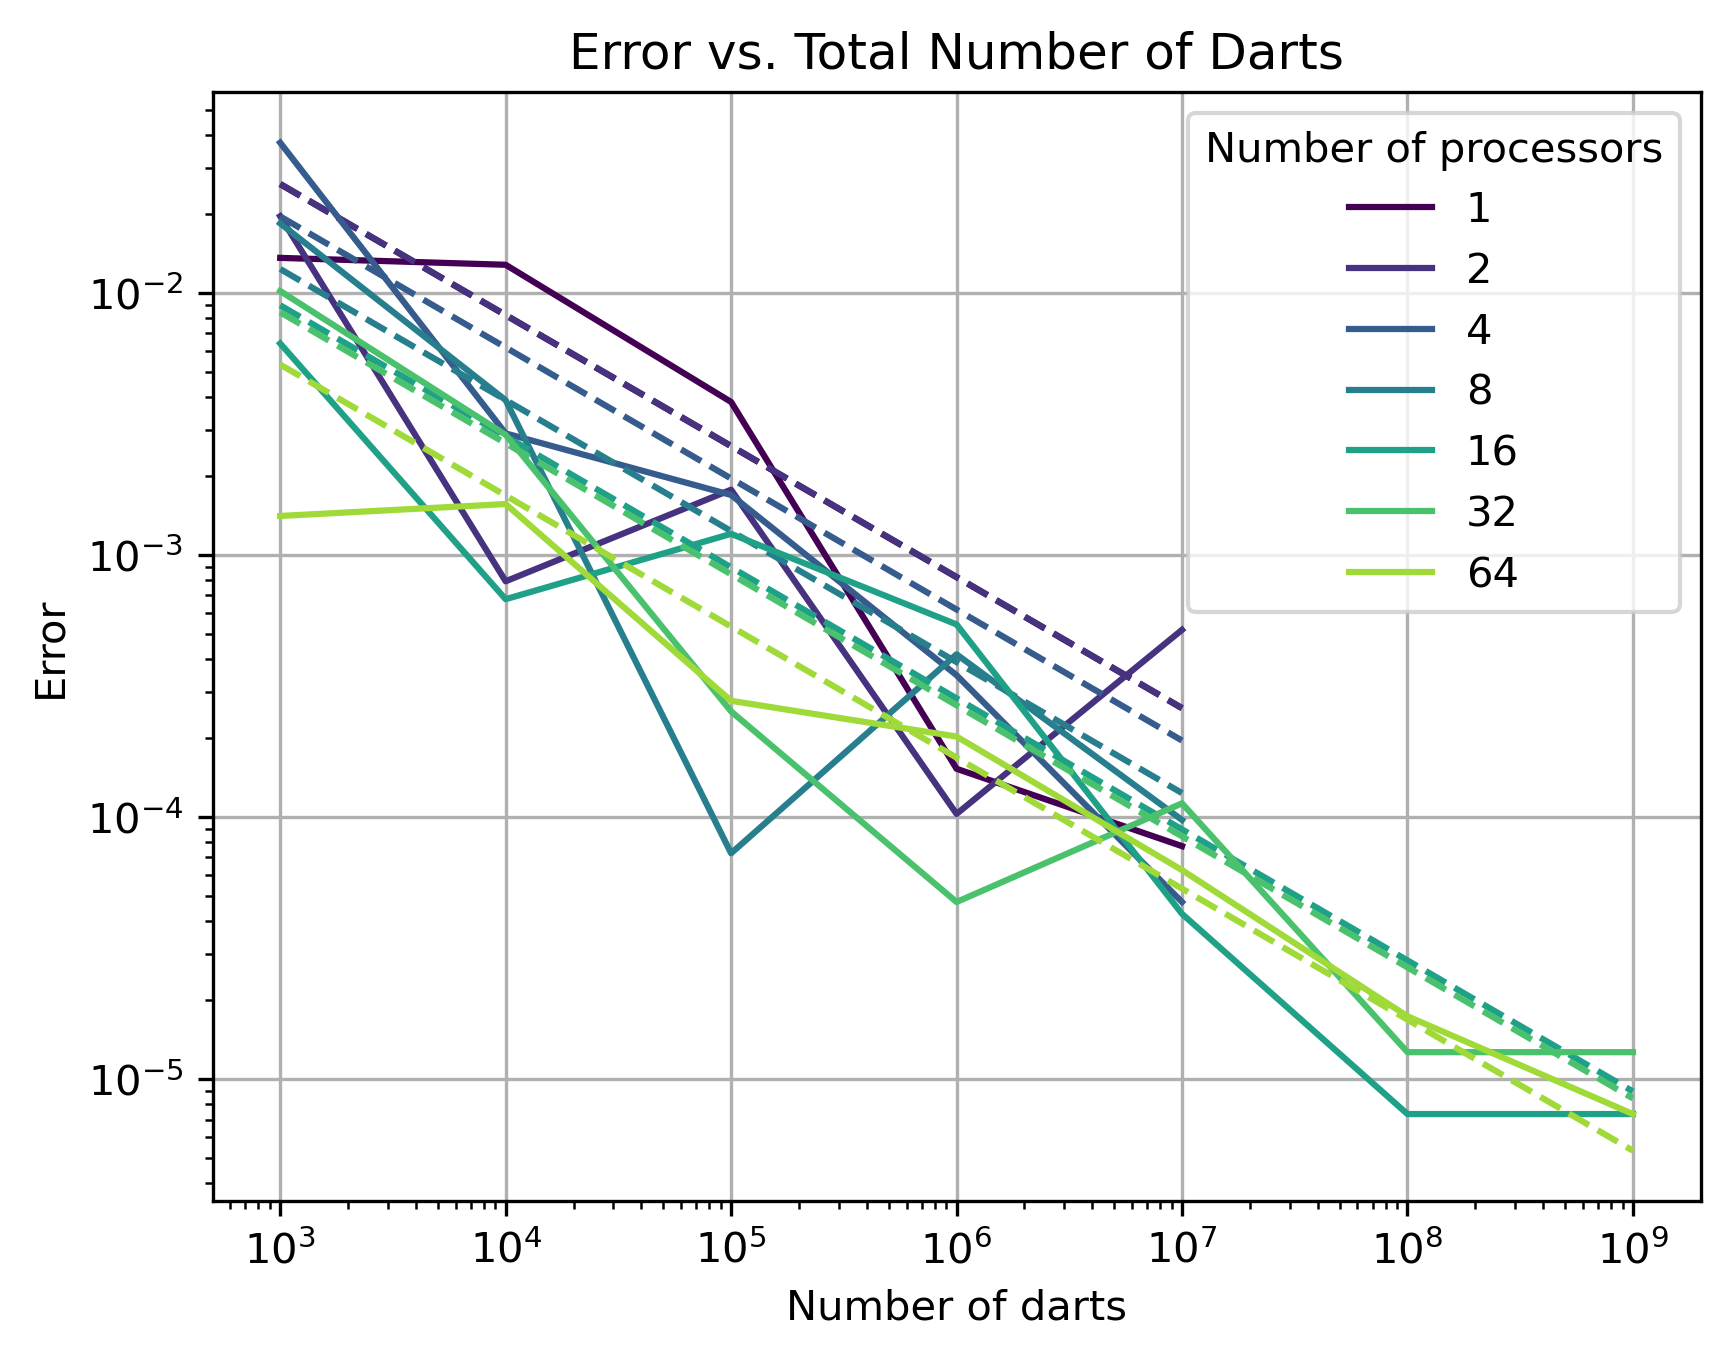

In [3]:
# Calculate Error
df["error"] = np.abs(df["pi_result"] - np.pi)

# Plot results 
fig, ax = plt.subplots()

cmap = plt.get_cmap('viridis')
procc_list = np.unique(df["num_processors"])
for i, processor in enumerate(procc_list):
    # Get logical index
    idx = (df["num_processors"] == processor) & (df["size_round"] == 128)

    # Fit polynomials
    y = np.square(df["error"].loc[idx]) * df["num_darts"].loc[idx]
    x = df["num_darts"].loc[idx]

    a = np.sqrt(np.polyfit(x,y,0))

    # Plot results
    line, = plt.plot(df["num_darts"].loc[idx], df["error"].loc[idx],c=cmap(i/len(procc_list)))
    line.set_label(processor)

    line_fit, = plt.plot(x,a/np.sqrt(x),linestyle='--')
    line_fit.set_color(line.get_color())
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Number of darts")
plt.ylabel("Error")
plt.legend(title="Number of processors")
plt.grid(True)
plt.title("Error vs. Total Number of Darts")
fig.savefig(os.path.join(path_figures,"img01.png"))


# Runtime

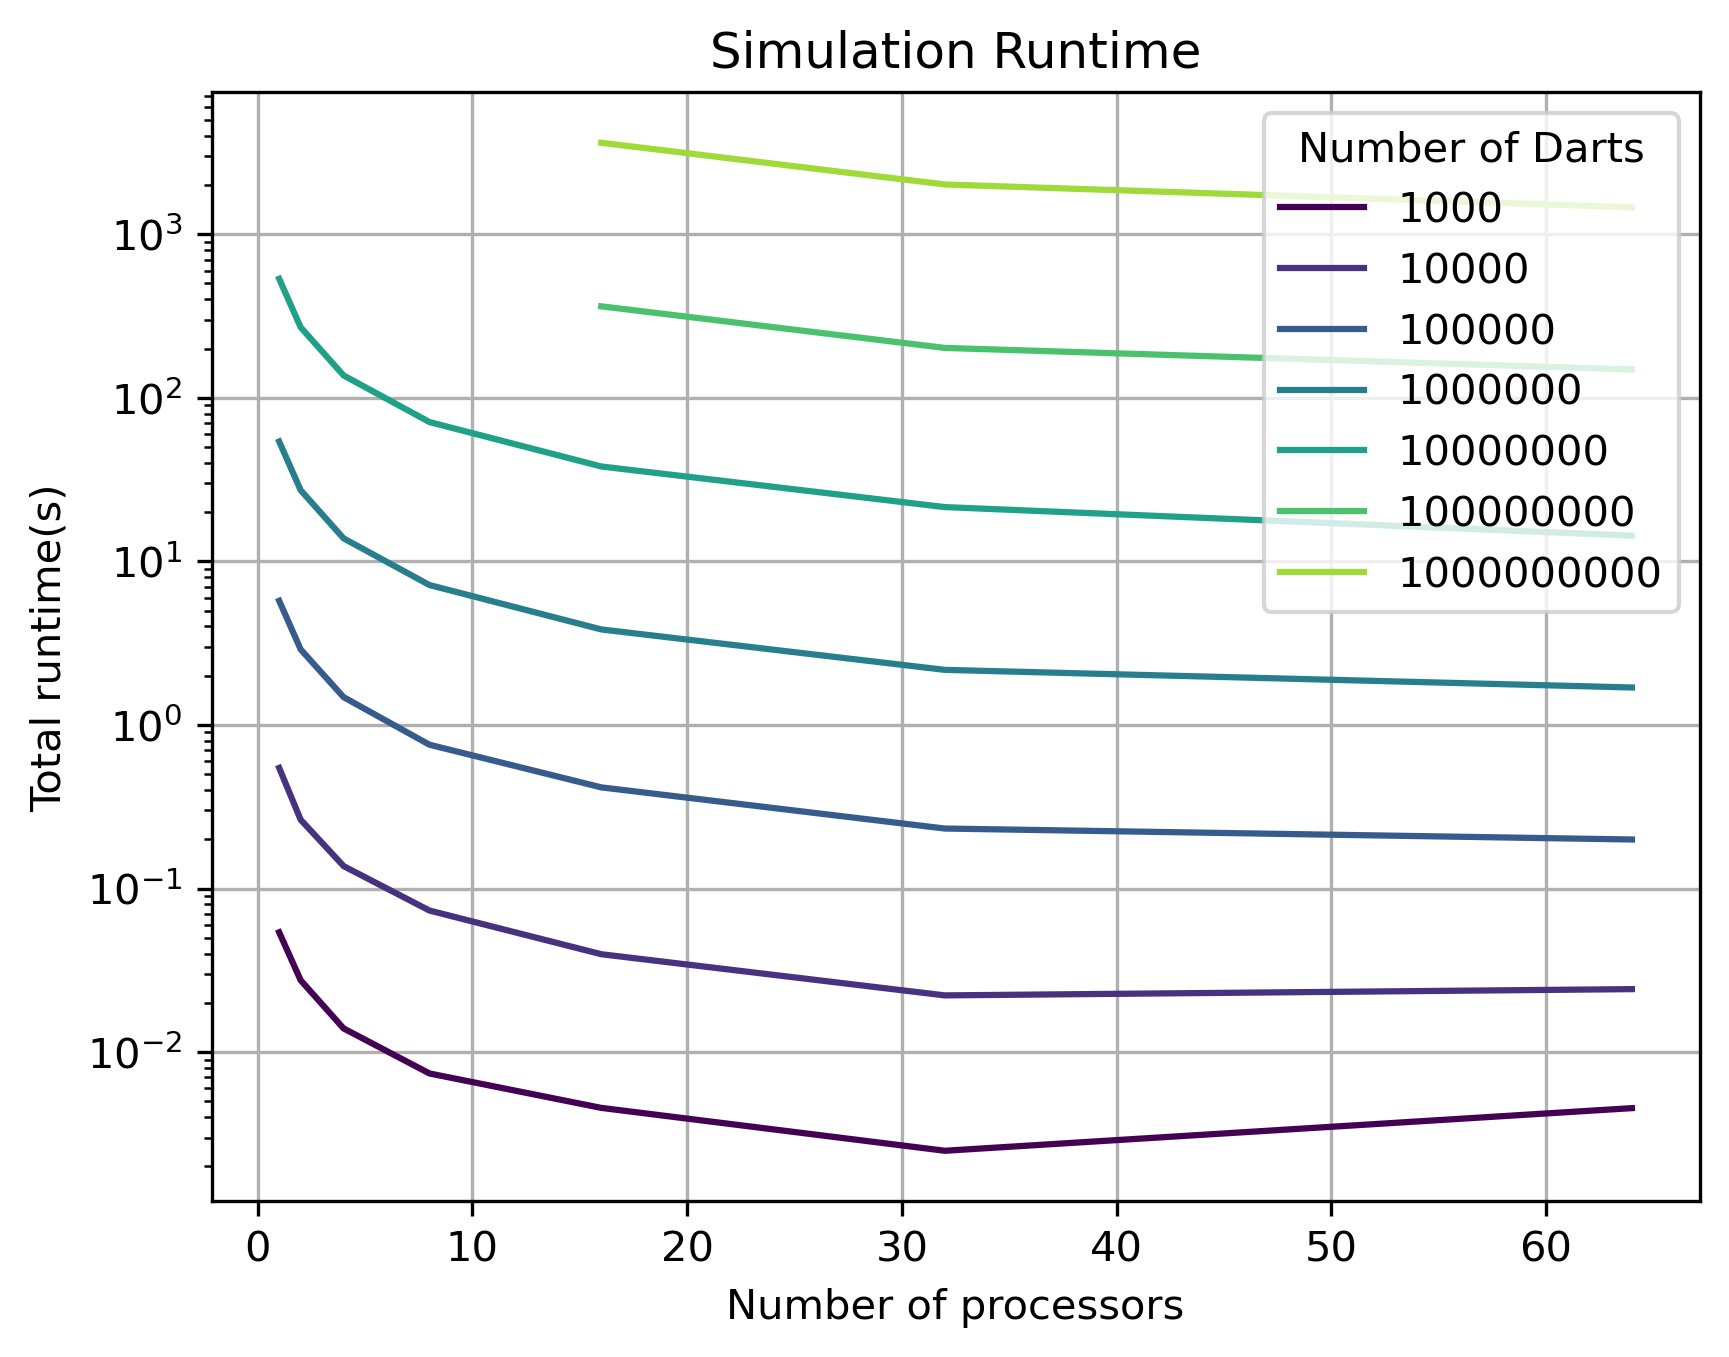

In [4]:
# Format figure
fig, ax = plt.subplots()
cmap = plt.get_cmap('viridis')

# Obtain list of dart counts
counts = np.unique(df["num_darts"])

for i, count in enumerate(counts):
    # Obtain logical index
    idx = (df["num_darts"]==count) & (df["size_round"] == 128)

    # Plot runtime
    x = df["num_processors"].loc[idx]
    y = df["total_runtime"].loc[idx]

    line, = plt.plot(x,y,c=cmap(i/len(counts)))
    line.set_label(count)

plt.grid(True)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Number of processors')
plt.ylabel('Total runtime(s)')
plt.title("Simulation Runtime")
plt.legend(title="Number of Darts")
fig.savefig(os.path.join(path_figures,"img02.png"))
